In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [331]:
DICT = {"limited": 1, "all": 6, "suns": 1, "battle": 2, "desperation.": 1, "to": 16, "finally": 1, "seized": 1, "every": 1, "more.": 1, "bringing": 1, "solution": 1, "try": 1, "force": 1, "fearing": 1, "ten": 1, "loathing": 1, "even": 2, "what": 1, "him.": 1, "must.Without": 1, "conduct": 1, "new": 2, "learned": 1, "ever": 1, "told": 1, "hesitation.But": 1, "never": 1, "everything,": 1, "great": 1, "changed": 1, "wherever": 1, "prison,": 1, "sealing": 1, "golden": 1, "deceived.": 1, "breath,": 1, "When": 1, "brought": 1, "endlessly,": 1, "swallowed": 1, "from": 3, "would": 4, "answered": 1, "wiped": 1, "wield": 1, "few": 1, "until": 1, "more": 1, "name.": 1, "name,": 1, "So": 1, "robbing": 1, "name:": 1, "women": 1, "this": 5, "suffocating,": 1, "blade": 4, "Runeterra": 1, "can": 1, "something": 1, "control": 1, "process": 1, "imitation": 1, "stole": 1, "united": 1, "drained": 1, "encountered.": 1, "desperately,": 1, "sword": 1, "instead": 1, "if": 1, "A": 1, "armies": 1, "victory...": 1, "sparkled": 1, "halted": 1, "such": 1, "a": 15, "realized": 2, "fallen": 1, "pulled": 1, "began": 3, "Blade...": 1, "help": 1, "essence": 1, "years": 2, "glory a": 1, "its": 1, "before": 2, "veil.Aatrox": 1, "late": 1, "world.": 1, "ready,": 1, "world,": 1, "it.": 1, "eventually": 1, "them": 1, "Shurima": 4, "greater": 1, "Mortals": 1, "masters,": 1, "fall.In": 1, "they": 3, "not": 1, "now": 1, "cage": 1, "always": 1, "feast": 1, "crudely": 1, "Disc": 1, "trap": 1, "Ascended,": 2, "conflict.": 1, "sands": 1, "beyond": 1, "empires": 1, "armor": 1, "tales": 1, "time,": 1, "Targonians": 1, "heavenly": 1, "newly": 1, "goes.": 1, "eternal": 1, "free": 2, "memory.Raging": 1, "could": 3, "threat": 1, "mortal": 2, "existential": 1, "onto": 1, "empire,": 1, "blind": 1, "surviving": 1, "fleeing": 1, "feel": 1, "traveled": 1, "groomed": 1, "magics": 1, "story": 1, "ancient": 1, "defend,": 1, "their": 2, "too": 1, "merciless": 1, "that": 8, "than": 2, "Setaka,": 1, "grew": 1, "fell,": 1, "annihilation": 1, "dawn,": 1, "Aspect": 2, "were": 3, "toward": 1, "powers": 1, "and": 24, "horrors": 1, "have": 1, "take": 1, "any": 2, "also": 1, "build": 1, "destroy": 1, "god-warriors": 1, "Ascended": 3, "clash": 1, "though": 1, "Despair": 1, "vitality": 1, "The": 2, "incursions": 1, "forever": 2, "Aatrox.And": 1, "gather": 1, "drive": 1, "battle,": 1, "destroyed\\u2014then": 1, "came": 1, "rebels": 1, "discovered": 1, "overwhelmed": 1, "one": 3, "knowledge": 1, "land,": 1, "behind": 1, "only": 3, "fortitude.": 1, "hope": 1, "centuries,": 1, "his": 20, "exceptional": 1, "Whether": 1, "him": 2, "seared": 1, "Twilight": 1, "self-described": 1, "predicted": 1, "them.": 1, "them,": 1, "ruins": 1, "unleash the": 1, "Sunborn": 1, "For": 1, "desperate": 1, "rifts": 1, "constellation": 1, "said": 1, "enough": 1, "foe,": 1, "ability": 1, "extent": 1, "exist.": 1, "many": 4, "against": 4, "became": 1, "forgotten": 1, "riddle": 1, "triumphed,": 1, "final,": 1, "reborn": 1, "injustice,": 1, "War": 1, "light": 1, "goal,": 1, "But": 1, "quickly": 2, "hellish": 1, "darkin.Fearing": 1, "Icathian": 1, "life": 2, "champion": 1, "thousand": 2, "bearer,": 1, "else": 1, "former": 1, "countless": 1, "opportunity,": 1, "these": 1, "as": 4, "will": 2, "Sunborn,": 1, "warrior-queen,": 1, "life,": 1, "Icathia,": 1, "larger": 2, "then": 1, "is": 2, "demon": 1, "it": 1, "embrace": 1, "in": 9, "return": 1, "it.The": 1, "prisoner\\u2019s": 1, "heart.": 1, "Void": 3, "rebellion": 1, "largest": 1, "monarch": 1, "conflict": 1, "noble": 2, "marches": 1, "mockery": 1, "Darkin": 1, "upon": 1, "marched": 1, "arrived": 1, "been,": 1, "nameless": 1, "stronger.Aatrox": 1, "weapon": 1, "It": 1, "fighting": 1, "without": 1, "instead.Now,": 1, "shut.": 1, "the": 45, "If": 1, "followed,": 1, "just": 1, "flesh": 1, "true": 1, "mistaken": 1, "cease": 1, "advance,": 1, "previous": 1, "death": 1, "had": 10, "gave": 1, "real": 1, "victims": 1, "survival": 1, "know": 2, "god,": 1, "wings": 1, "Void ": 1, "like": 2, "lost": 1, "shaped": 1, "oblivion": 1, "avatar": 1, "become": 1, "foolish": 1, "unsolvable,": 1, "Sun": 1, "creation": 1, "some": 1, "back": 1, "dead": 1, "immortal": 1, "born": 1, "mighty": 1, "embodied": 1, "perverse": 1, "for": 5, "grinding": 1, "everything": 1, "confinement...": 1, "battle\\u2014where": 1, "He": 2, "apocalyptic": 1, "be": 2, "strained": 1, "ideal.": 1, "darkin,": 1, "by": 2, "on": 1, "body.In": 1, "carried": 1, "himself,": 1, "of": 27, "consciousness": 1, "Remade": 1, "scornful": 1, "slightly": 1, "or": 5, "into": 2, "bound": 1, "hope:": 1, "times,": 2, "been": 5, "span": 1, "Though": 2, "long": 1, "way": 1, "was": 6, "war": 2, "himself": 1, "form": 1, "but": 2, "searching": 1, "another,": 1, "with": 1, "he": 15, "darkness,": 1, "mortals": 2, "dangerous": 1, "inside": 1, "vanguard": 1, "grasp": 1, "called": 1, "side,": 1, "celestial": 1, "proved": 1, "an": 1, "single": 1, "die.": 1, "at": 3, "Aatrox": 8, "brethren": 1, "maybe": 1, "encountered.After": 1, "no": 1, "Never": 1, "clings": 1, "other": 1, "test": 1, "forcing": 1, "desert": 1, "intervened.": 1, "sword.": 1, "time": 1, "original": 1, "once": 2}


In [332]:
df = pd.DataFrame(data=DICT, index = [0])

In [333]:
line = ' '
df.columns

Index(['limited', 'all', 'suns', 'battle', 'desperation.', 'to', 'finally',
       'seized', 'every', 'more.',
       ...
       'clings', 'other', 'test', 'forcing', 'desert', 'intervened.', 'sword.',
       'time', 'original', 'once'],
      dtype='object', length=386)

In [361]:
for x in df:

    tokens = str(x)
    tokens.strip()
    tokens = tokens.lower()
    tokens = tokens.split('.')
    print(tokens)
    
    for tk in tokens:
        if len(tk) > 1:
            line += ' ' + tk + ' '
   
    
    #line += tokens + ' '
        

['limited']
['all']
['suns']
['battle']
['desperation', '']
['to']
['finally']
['seized']
['every']
['more', '']
['bringing']
['solution']
['try']
['force']
['fearing']
['ten']
['loathing']
['even']
['what']
['him', '']
['must', 'without']
['conduct']
['new']
['learned']
['ever']
['told']
['hesitation', 'but']
['never']
['everything,']
['great']
['changed']
['wherever']
['prison,']
['sealing']
['golden']
['deceived', '']
['breath,']
['when']
['brought']
['endlessly,']
['swallowed']
['from']
['would']
['answered']
['wiped']
['wield']
['few']
['until']
['more']
['name', '']
['name,']
['so']
['robbing']
['name:']
['women']
['this']
['suffocating,']
['blade']
['runeterra']
['can']
['something']
['control']
['process']
['imitation']
['stole']
['united']
['drained']
['encountered', '']
['desperately,']
['sword']
['instead']
['if']
['a']
['armies']
['victory', '', '', '']
['sparkled']
['halted']
['such']
['a']
['realized']
['fallen']
['pulled']
['began']
['blade', '', '', '']
['help']
['essen

In [363]:
print(line)


 l i m i t e d a l l s u n s b a t t l e d e s p e r a t i o n t o f i n a l l y s e i z e d e v e r y m o r e b r i n g i n g s o l u t i o n t r y f o r c e f e a r i n g t e n l o a t h i n g e v e n w h a t h i m m u s t w i t h o u t c o n d u c t n e w l e a r n e d e v e r t o l d h e s i t a t i o n b u t n e v e r e v e r y t h i n g , g r e a t c h a n g e d w h e r e v e r p r i s o n , s e a l i n g g o l d e n d e c e i v e d b r e a t h , w h e n b r o u g h t e n d l e s s l y , s w a l l o w e d f r o m w o u l d a n s w e r e d w i p e d w i e l d f e w u n t i l m o r e n a m e n a m e , s o r o b b i n g n a m e : w o m e n t h i s s u f f o c a t i n g , b l a d e r u n e t e r r a c a n s o m e t h i n g c o n t r o l p r o c e s s i m i t a t i o n s t o l e u n i t e d d r a i n e d e n c o u n t e r e d d e s p e r a t e l y , s w o r d i n s t e a d i f a r m i e s v i c t o r y s p a r k l e d h a l t e d s u c h r e a l i z e d f a l l e n p u l l e d b e g a

In [386]:
stopword = set(STOPWORDS)
stopword.add('suns')
stopword.add('instead')
stopword.add('limited')

In [387]:
wordcloud = WordCloud(stopwords=stopword, background_color="white", max_words=1000).generate(line)


In [388]:
wordcloud

In [393]:
plt.figure(figsize=(8,8),facecolor=None)


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

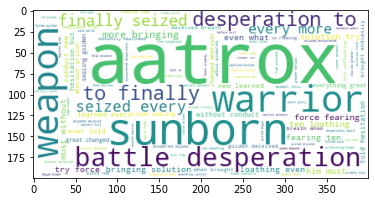

In [394]:
plt.imshow(wordcloud)

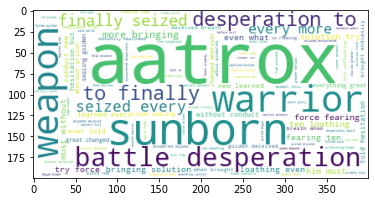

In [395]:
plt.imshow(wordcloud)

In [396]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

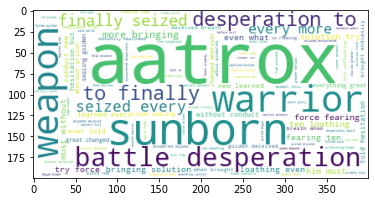

In [398]:
plt.imshow(wordcloud)